In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [4]:
# Load the dataset
data = pd.read_csv("customerdata.csv")

# Select relevant features for segmentation
features = data[['Age', 'TotalSpent']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

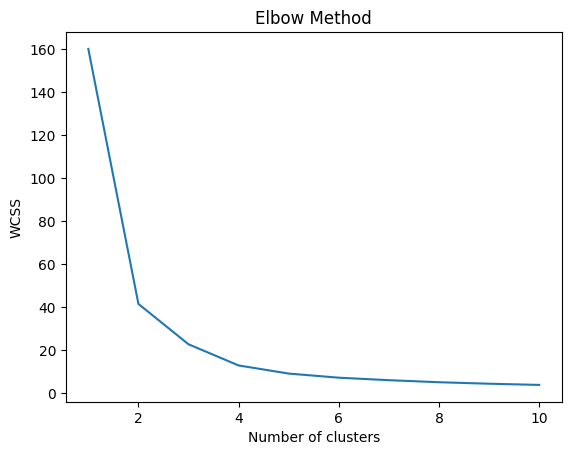

In [5]:
# Determine the optimal number of clusters (K) using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [6]:
# Based on the elbow method, choose an appropriate number of clusters (K)
k = 3  # You can adjust this based on the elbow method's graph

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Reduce data dimensionality for visualization (optional)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
reduced_centers = pca.transform(kmeans.cluster_centers_)

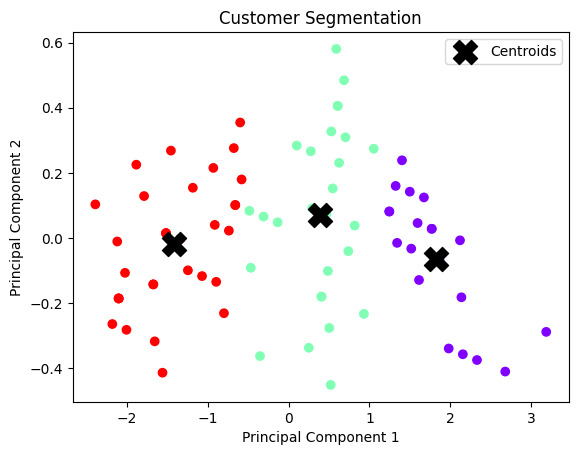

               Name  Age  TotalSpent  Cluster
0       Anna Müller   32          25        0
1   Lukas Schneider   45          32        1
2     Sarah Fischer   28          18        0
3        Lena Weber   38          29        1
4        Tim Wagner   22          14        0
..              ...  ...         ...      ...
75      Elisa Vogel   29          24        0
76      Elias Weber   52          40        2
77   Sophie Schäfer   31          26        0
78   Julian Hofmann   45          38        2
79      Lena Müller   38          31        1

[80 rows x 4 columns]


In [7]:
# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='rainbow')
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Print the segmentation results
print(data[['Name', 'Age', 'TotalSpent', 'Cluster']])